### Sumber dataset

https://archive.ics.uci.edu/dataset/45/heart+disease

### Penjelasan Fitur dan Variabel

## Deskripsi Dataset Heart Disease (UCI)

Dataset ini digunakan untuk memprediksi kemungkinan seseorang menderita **penyakit jantung** berdasarkan fitur-fitur medis tertentu. Dataset berasal dari UCI Machine Learning Repository dan merupakan salah satu dataset paling populer untuk tugas klasifikasi.

Informasi:
- **Sumber**: UCI Machine Learning Repository
- **Tujuan**: Klasifikasi apakah seseorang menderita penyakit jantung atau tidak
- **Jumlah fitur umum**: 14 (digunakan dari total 76 fitur asli)
- **Jenis target**: Biner (0 = tidak sakit, 1 = sakit)

### 🧬 Fitur-Fitur Utama:
| Nama Fitur   | Deskripsi Singkat |
|--------------|-------------------|
| age          | Usia pasien dalam tahun |
| sex          | Jenis kelamin (1 = pria, 0 = wanita) |
| cp           | Tipe nyeri dada (0-3) |
| trestbps     | Tekanan darah saat istirahat (mm Hg) |
| chol         | Kolesterol total dalam darah (mg/dl) |
| fbs          | Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak) |
| restecg      | Hasil elektrokardiografi saat istirahat (0-2) |
| thalach      | Detak jantung maksimum yang dicapai |
| exang        | Apakah mengalami angina karena olahraga? (1 = ya, 0 = tidak) |
| oldpeak      | Depresi segmen ST akibat olahraga |
| slope        | Kemiringan segmen ST saat latihan |
| ca           | Jumlah pembuluh darah utama (0-3) yang terlihat melalui fluoroskopi |
| thal         | Hasil tes thallium (0 = normal, 1 = cacat tetap, 2 = cacat reversibel) |
| target       | Apakah pasien menderita penyakit jantung? (0 = tidak, 1 = ya) |


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

## data (as pandas dataframes)
data = heart_disease.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("heart_disease.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      1

In [ ]:
display(data) #display dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Eksplorasi data

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(303, 14)

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# missin values

In [ ]:
import pandas as pd

# Asumsikan data sudah dimuat ke dalam variabel `data`
# (Jika belum, bisa pakai ucimlrepo seperti sebelumnya)

# 1. Deteksi baris yang memiliki missing value
rows_with_missing = data[data.isnull().any(axis=1)]

# 2. Tampilkan baris yang memiliki nilai kosong
print("Rows with Missing Values:")
print(rows_with_missing)

# 3. Deteksi missing value per sel
missing_values = data.isnull()

# 4. Hitung jumlah missing value di setiap kolom
missing_counts = missing_values.sum()

# 5. Tampilkan total missing value per kolom
print("\nMissing Value Counts:")
print(missing_counts)

# 6. Tampilkan total keseluruhan missing value (opsional)
print(f"\nTotal Missing Values in Dataset: {missing_counts.sum()}")

Rows with Missing Values:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
266   52    1   4       128   204    1        0      156      1      1.0   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
87       1  0.0   NaN    0  
166      1  NaN   3.0    0  
192      2  NaN   7.0    1  
266      2  0.0   NaN    2  
287      2  NaN   7.0    0  
302      1  NaN   3.0    0  

Missing Value Counts:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Total

# Data Outlier atau tidak

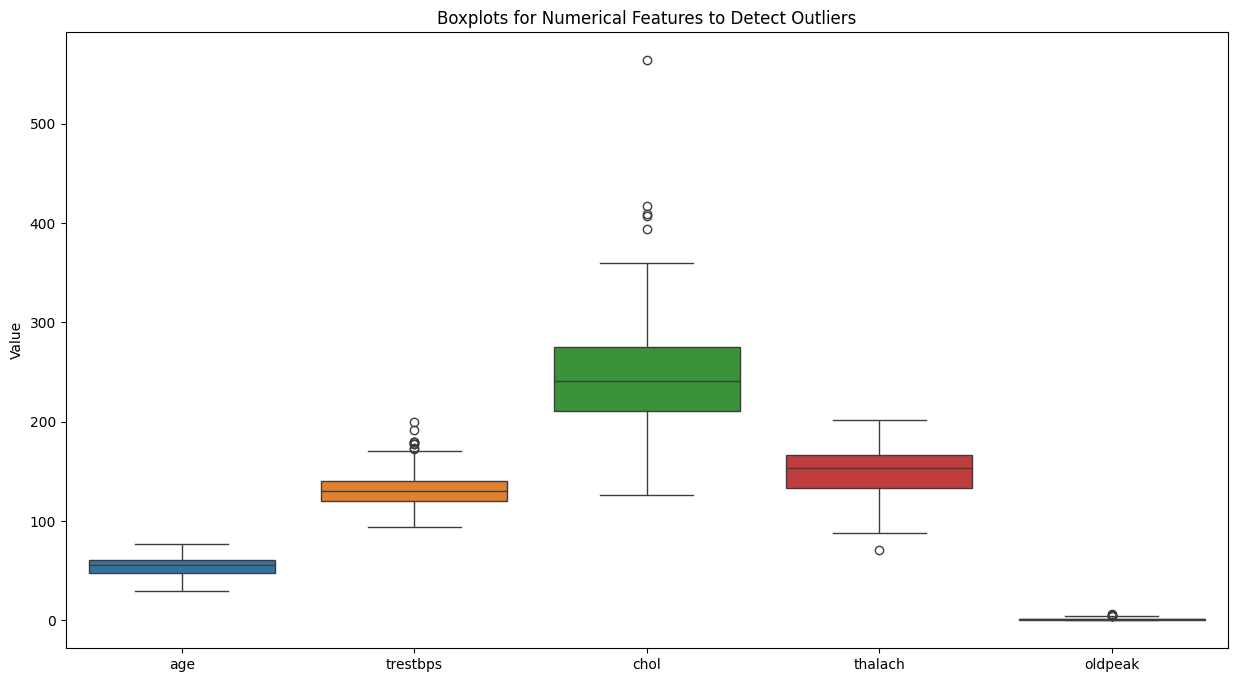

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for boxplotting, excluding the target 'num'
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 8)) # Adjusted figure size for multiple boxplots
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplots for Numerical Features to Detect Outliers')
plt.ylabel('Value')
plt.show()

# Visualisasi

<Figure size 1200x1000 with 0 Axes>

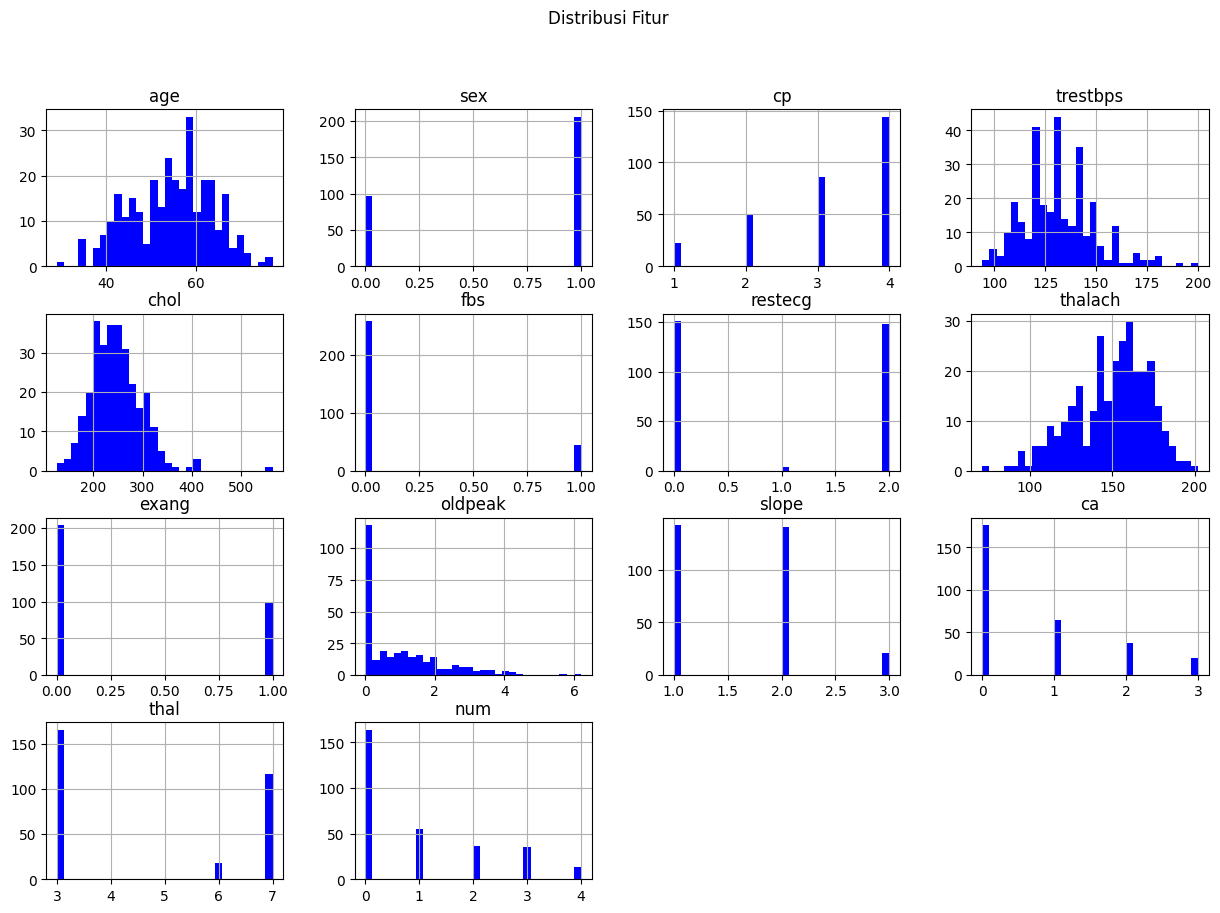

In [ ]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

# sebelum Preprocessing

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Gender by Name dari  (ID:45)
heart_disease = fetch_ucirepo(id=45)

# Ambil data sebagai DataFrame
data = heart_disease.data.original

# Tampilkan 20 baris pertama sebelum preprocessing
print("Sebelum Preprocessing:")
print(data.head(20))


Sebelum Preprocessing:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   1       145   233    1        2      150      0      2.3   
1    67    1   4       160   286    0        2      108      1      1.5   
2    67    1   4       120   229    0        2      129      1      2.6   
3    37    1   3       130   250    0        0      187      0      3.5   
4    41    0   2       130   204    0        2      172      0      1.4   
5    56    1   2       120   236    0        0      178      0      0.8   
6    62    0   4       140   268    0        2      160      0      3.6   
7    57    0   4       120   354    0        0      163      1      0.6   
8    63    1   4       130   254    0        2      147      0      1.4   
9    53    1   4       140   203    1        2      155      1      3.1   
10   57    1   4       140   192    0        0      148      0      0.4   
11   56    0   2       140   294    0        2      153      0      1.3   
12

# Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np # Import numpy

# Load dataset dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom dari dokumentasi UCI
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs",
           "restecg", "thalach", "exang", "oldpeak", "slope",
           "ca", "thal", "target"]

# Load dan atur missing values
data = pd.read_csv(url, names=columns)
# Replace '?' with numpy.nan
data = data.replace('?', np.nan)

# Konversi kolom numerik yang masih object to float using pd.to_numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')


# Impute missing values
imputer = SimpleImputer(strategy="mean")
# Impute on all numerical columns that might have NaNs
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Pisahkan fitur dan target
X = data.drop(columns="target")
y = data["target"].astype(int) # Ensure target is int

# Skala data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data latih & uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Latih model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.18      0.18      0.18        17
           2       0.25      0.17      0.20        12
           3       0.11      0.10      0.11        10
           4       0.00      0.00      0.00         4

    accuracy                           0.55        91
   macro avg       0.26      0.27      0.26        91
weighted avg       0.49      0.55      0.51        91



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Modeling: Klasifikasi dengan Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Changed from MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X and y are already defined and processed (e.g., scaled)
# If not, you would need to define them here.
# Based on the notebook state, X and y are available from the previous steps.

# 1. Split data - Use the X and y from previous steps (likely from df_scaled)
# X and y are already split in cell tiPI_3vCbKx2 into X_train, X_test, y_train, y_test
# So, we can remove the split step here and use the existing split data.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Buat dan latih model Naive Bayes
model = GaussianNB() # Changed from MultinomialNB
model.fit(X_train, y_train)

# 3. Prediksi
y_pred = model.predict(X_test)

# 4. Evaluasi
print("=== Akurasi ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
# Ensure target_names match the unique values in y_test and y_pred if necessary
# Based on the data description, 'num' can be 0, 1, 2, 3, 4.
# Let's define target_names to be safe, assuming these are the possible values.
target_names = [str(i) for i in sorted(y_test.unique())] # Dynamically get unique class names
print(classification_report(y_test, y_pred, target_names=target_names))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Akurasi ===
0.3114754098360656

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.00      0.00      0.00        12
           2       0.25      0.11      0.15         9
           3       0.00      0.00      0.00         7
           4       0.08      0.75      0.15         4

    accuracy                           0.31        61
   macro avg       0.27      0.28      0.20        61
weighted avg       0.52      0.31      0.36        61


=== Confusion Matrix ===
[[15  0  1  0 13]
 [ 0  0  1  2  9]
 [ 0  1  1  1  6]
 [ 0  0  1  0  6]
 [ 0  0  0  1  3]]


# Evaluasi model tersebut

Accuracy: 0.3115

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.00      0.00      0.00        12
           2       0.25      0.11      0.15         9
           3       0.00      0.00      0.00         7
           4       0.08      0.75      0.15         4

    accuracy                           0.31        61
   macro avg       0.27      0.28      0.20        61
weighted avg       0.52      0.31      0.36        61



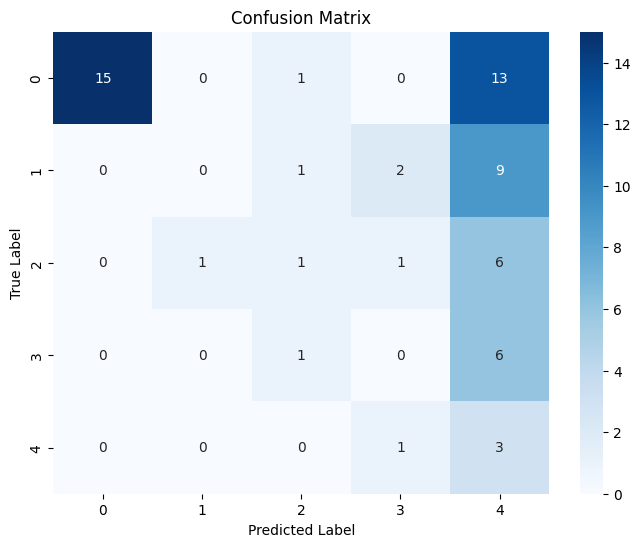

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 2. Classification report
print("\nClassification Report:")
# Dynamically get unique class names from y_test
target_names = [str(i) for i in sorted(y_test.unique())]
print(classification_report(y_test, y_pred, target_names=target_names))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6)) # Adjusted figure size for better readability with 5 classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, # Use dynamic target_names for x-axis labels
            yticklabels=target_names) # Use dynamic target_names for y-axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()